<a href="https://colab.research.google.com/github/Prateek-Bhardwaj/Machine-Learning-Projects/blob/main/NLP_Practice_(PUBMed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PUBMED Paper (NLP)
IN this notebook we are goint to create aa NLP model to classify abstract sentences into the role the play. We are going to get through some of the best model experiment using the *TENSORFLOW*

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-5253afff-3a9f-fd79-b3d4-511f02d05a69)


Downloading the dataset. The dataset is consist of 4 different parts i.e.
* `PubMed_200k_RCT` (Which contains full data)
* `PubMed_200k_RCT_numbers_replaced_with_at_sign` ( with numbers replaced with @ signs)
* `PubMed_20k_RCT` (Which is subset of 200k dataset )
* `PubMed_20k_RCT_numbers_replaced_with_at_sign` (Subset of 200k dataset with numbers replaced with @ sign) 

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.


In [ ]:
!ls pubmed-rct/

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


The data is divided into 3 parts
1. `dev.txt` -> validation dataset
2. `test.txt` -> test dataset
3. `train.txt` -> train dataset

In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
def getlines(filepath):
  with open(filepath,'r') as f:
    return f.readlines()

In [ ]:
lines = getlines(data_dir+"train.txt")
lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

creating function to preprocess data and converting them into pandas dataframes

In [ ]:
def preprocess_text_data(filepath):
  all_lines = getlines(filepath)
  abstract_lines = ""
  abstract_samples = []
  for line in all_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()
      for line_number, line_text in enumerate(abstract_line_split):
        dict = {}
        target_text_split = line_text.split("\t")
        dict["line number"] = line_number
        dict["target"] = target_text_split[0]
        dict["text"] = target_text_split[1].lower()
        dict["total lines"] = len(abstract_line_split)-1
        abstract_samples.append(dict)

    else:
      abstract_lines += line
  return abstract_samples

In [ ]:
train_samples = preprocess_text_data(data_dir+"train.txt")
val_samples = preprocess_text_data(data_dir+"dev.txt")
test_samples = preprocess_text_data(data_dir+"test.txt")

In [ ]:
train_samples[:10]

[{'line number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total lines': 11},
 {'line number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total lines': 11},
 {'line number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total lines': 11},
 {'line number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total lines': 11},
 {'line number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head()

,line number,target,text,total lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11


In [ ]:
train_lines = train_df["text"].tolist()
val_lines = val_df["text"].tolist()
test_lines = test_df["text"].tolist()

In [ ]:
train_lines[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### Encoding Our targets




In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse = False)
train_one_hot = one_hot.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_one_hot = one_hot.transform(val_df["target"].to_numpy().reshape(-1,1))
test_one_hot = one_hot.transform(test_df["target"].to_numpy().reshape(-1,1))

In [ ]:
train_one_hot[:10]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_label_encoder = label_encoder.fit_transform(train_df["target"].to_numpy())
val_label_encoder = label_encoder.fit_transform(val_df["target"].to_numpy())
test_label_encoder = label_encoder.fit_transform(test_df["target"].to_numpy())

In [ ]:
train_label_encoder[:10]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4])

### Model 0: Using SKLearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model_0 = Pipeline([
                    ("TFIDF",TfidfVectorizer()),
                    ("naive bayes",MultinomialNB())
])
model_0.fit(X=train_lines,y=train_label_encoder)

Pipeline(memory=None,
         steps=[('TFIDF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('naive bayes',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
model_0.score(val_lines,val_label_encoder)

0.7218323844829869

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
model_0_preds = model_0.predict(val_lines)

In [ ]:
model_0_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
model_0_results = calculate_results(val_label_encoder,model_0_preds)
model_0_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# this will split words and other things in a single line each time.
l = [sentence.split() for sentence in train_lines]
l[4];

In [ ]:
# average length of sentences
avg_length = [len(sentence.split()) for sentence in train_lines]
mean_len = np.mean(avg_length)
mean_len

26.338269273494777

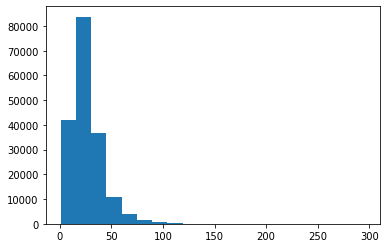

In [ ]:
import matplotlib.pyplot as plt
plt.hist(avg_length,bins=20); # to look how much portion covers how much part of data.

In [ ]:
percentile_len = np.percentile(avg_length,95)

In [ ]:
percentile_len

55.0

## Converting data into vectors

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
text_vectorizer = TextVectorization(max_tokens=68000,output_sequence_length=55)

In [ ]:
text_vectorizer.adapt(train_lines)

In [ ]:
import random
target_sentence = random.choice(train_lines)
print(f"""
sentence: {target_sentence} \n
length of sentence: {len(target_sentence.split())} \n
Vectorized sentence: {text_vectorizer(target_sentence)}
""")


sentence: outcome measures included intraocular pressure ( iop ) , use of glaucoma medications , visual acuity , surgical complications , and failure ( iop > @ mm hg or not reduced by @ % , iop @ mm hg , additional glaucoma surgery , or loss of light perception vision ) . 

length of sentence: 52 

Vectorized sentence: [  86  213  121 1944  200 1110   87    4 1803 1098  290 1114  306  296
    3  292 1110  234  855   16   31  191   22 1110  234  855  365 1803
  115   16  264    4 1525 1569 1922    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]



In [ ]:
data_vocablury = text_vectorizer.get_vocabulary()
print(f"""
length of vocablury: {len(data_vocablury)} \n
top 5 vocablury: {data_vocablury[:5]} \n
least 5 vocabulary: {data_vocablury[-5:]}
""")


length of vocablury: 64841 

top 5 vocablury: ['', '[UNK]', 'the', 'and', 'of'] 

least 5 vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']



In [ ]:
embed_layer = layers.Embedding(input_dim=len(data_vocablury), output_dim=128,mask_zero=True)

In [ ]:
print(f"Sentence: {target_sentence}")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Text Vectorized Sentence: {vectorized_sentence}")
embed_sentence = embed_layer(vectorized_sentence)
print(f"Embeded Sentence: {embed_sentence}")
print(f"shape of embeded sentence: {embed_sentence.shape}")

Sentence: outcome measures included intraocular pressure ( iop ) , use of glaucoma medications , visual acuity , surgical complications , and failure ( iop > @ mm hg or not reduced by @ % , iop @ mm hg , additional glaucoma surgery , or loss of light perception vision ) .
Text Vectorized Sentence: [[  86  213  121 1944  200 1110   87    4 1803 1098  290 1114  306  296
     3  292 1110  234  855   16   31  191   22 1110  234  855  365 1803
   115   16  264    4 1525 1569 1922    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
Embeded Sentence: [[[ 0.04980795  0.0318089   0.04377234 ... -0.01115154 -0.0281353
    0.01690617]
  [ 0.02896854  0.03993198 -0.00549297 ...  0.04995421  0.03407793
    0.02644301]
  [-0.00363748  0.04435607  0.01492833 ...  0.00962361  0.03323868
    0.01869786]
  ...
  [-0.00479759  0.00491427 -0.04349321 ... -0.04113173 -0.0375994
    0.02982283]
  [-0.00479759  0.00491427 -0.04349321 ... -0.04113173 -0.0375

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_lines, train_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_lines, val_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_lines, test_one_hot))
train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

### Model 1: Conv1D with token embeddings

In [ ]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
text_vectorizer_layer = text_vectorizer(inputs)
embeded_layer = embed_layer(text_vectorizer_layer)
x = layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(embeded_layer)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5,activation="softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)
model_1.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_model_1 = model_1.fit(train_dataset,steps_per_epoch=len(train_dataset),epochs=3,validation_data=valid_dataset,validation_steps=0.25*len(valid_dataset))

Epoch 1/3
5627/5627 [==============================] - 103s 13ms/step - loss: 0.6144 - accuracy: 0.7763 - val_loss: 0.5409 - val_accuracy: 0.8070
Epoch 2/3
5627/5627 [==============================] - 75s 13ms/step - loss: 0.4520 - accuracy: 0.8412 - val_loss: 0.5373 - val_accuracy: 0.8070
Epoch 3/3
5627/5627 [==============================] - 74s 13ms/step - loss: 0.3712 - accuracy: 0.8728 - val_loss: 0.5709 - val_accuracy: 0.8025


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.5662 - accuracy: 0.8061


[0.5662000775337219, 0.806103527545929]

In [ ]:
model_1.pred_probs = model_1.predict(valid_dataset)
model_1.pred_probs

array([[6.34674013e-01, 9.48880240e-03, 2.92561173e-01, 3.67655270e-02,
        2.65105069e-02],
       [5.57024956e-01, 7.75613189e-02, 2.42010667e-03, 3.53417218e-01,
        9.57641844e-03],
       [1.57862559e-01, 5.86261926e-03, 1.84907566e-03, 8.34326506e-01,
        9.92523419e-05],
       ...,
       [6.34461855e-07, 8.16550255e-06, 1.85465300e-03, 7.63131922e-08,
        9.98136401e-01],
       [1.06566548e-01, 5.54414809e-01, 1.45148441e-01, 2.74680685e-02,
        1.66402116e-01],
       [2.73024337e-03, 9.93020833e-01, 4.10908740e-03, 3.54026524e-05,
        1.04458144e-04]], dtype=float32)

In [ ]:
model_1.pred_probs = model_1.pred_probs.argmax(axis=1)

In [ ]:
model_1.pred_probs

array([0, 0, 3, ..., 4, 1, 1])

In [ ]:
model_1_results = calculate_results(y_true=val_label_encoder,y_pred=model_1.pred_probs)
model_1_results

{'accuracy': 80.61035350191976,
 'f1': 0.8033752411179125,
 'precision': 0.8029789844532127,
 'recall': 0.8061035350191976}

### Model 2: Feature extraction with pretrained token embeddings

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
tf_hub_layer = tf_hub_embedding_layer(inputs)
# x = layers.Dense(128,activation="relu")
outputs = layers.Dense(5,activation="softmax")(tf_hub_layer)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_model_2 = model_2.fit(train_dataset, steps_per_epoch=len(train_dataset),epochs=3,validation_data=valid_dataset,validation_steps=0.1*len(valid_dataset))

Epoch 1/3
5627/5627 [==============================] - 98s 17ms/step - loss: 0.9033 - accuracy: 0.6644 - val_loss: 0.8004 - val_accuracy: 0.6957
Epoch 2/3
5627/5627 [==============================] - 98s 17ms/step - loss: 0.7869 - accuracy: 0.7006 - val_loss: 0.7767 - val_accuracy: 0.6997
Epoch 3/3
5627/5627 [==============================] - 98s 17ms/step - loss: 0.7721 - accuracy: 0.7054 - val_loss: 0.7674 - val_accuracy: 0.7063


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 16s 17ms/step - loss: 0.7622 - accuracy: 0.7095


[0.7622484564781189, 0.7094532251358032]

In [ ]:
model_2_pred_probs = tf.argmax(model_2.predict(valid_dataset),axis=1)

In [ ]:
model_2_results = calculate_results(y_true=val_label_encoder,y_pred=model_2_pred_probs)

In [ ]:
model_2_results

{'accuracy': 70.94531974050047,
 'f1': 0.7051358320729274,
 'precision': 0.7043451614354099,
 'recall': 0.7094531974050047}

In [ ]:
model_1_results

{'accuracy': 80.61035350191976,
 'f1': 0.8033752411179125,
 'precision': 0.8029789844532127,
 'recall': 0.8061035350191976}

In [ ]:
model_0_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

### Model 3: Conv1D with character embeddings
# Creating Character level tokenising layer.

In [ ]:
def char_dist(text):
  return " ".join(list(text))

In [ ]:
train_char = [char_dist(sentence) for sentence in train_lines]
val_char = [char_dist(sentence) for sentence in val_lines]
test_char = [char_dist(sentence) for sentence in test_lines]

In [ ]:
train_char[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
char_length = [len(sentence) for sentence in train_lines]
mean_char_length = np.mean(char_length)
mean_char_length

149.3662574983337

In [ ]:
# calculating top 95 percentile
output_percentile = int(np.percentile(char_length,95))
output_percentile

290

In [ ]:
# Creating character level text vectorzation layer
import string
alphabets = string.ascii_lowercase + string.digits + string.punctuation
max_character_length = len(alphabets) +2 # 2 is added because alphabets does not include space and [UNC]

In [ ]:
char_vectorizer = TextVectorization(max_tokens=max_character_length,output_sequence_length=output_percentile,name="Vectorization")
char_vectorizer.adapt(train_char)

In [ ]:
char_data_vocabulary = char_vectorizer.get_vocabulary()
random_char = random.choice(train_char)
vectorized_character = char_vectorizer(random_char)
print(f"""
Char Sentence: {random_char} \n
length of data vocabulary: {len(char_data_vocabulary)} \n
vectorized char: {vectorized_character} \n
length of vectorized char: {len(vectorized_character)}
""")


Char Sentence: a   c u r r e n t   c h a l l e n g e   i n   m e n t a l   h e a l t h   c a r e   i s   h o w   t o   c l o s e   t h i s   t r e a t m e n t   g a p   a n d   i n c r e a s e   a c c e s s   t o   p s y c h o l o g i c a l   s e r v i c e s   . 

length of data vocabulary: 28 

vectorized char: [ 5 11 16  8  8  2  6  3 11 13  5 12 12  2  6 18  2  4  6 15  2  6  3  5
 12 13  2  5 12  3 13 11  5  8  2  4  9 13  7 20  3  7 11 12  7  9  2  3
 13  4  9  3  8  2  5  3 15  2  6  3 18  5 14  5  6 10  4  6 11  8  2  5
  9  2  5 11 11  2  9  9  3  7 14  9 19 11 13  7 12  7 18  4 11  5 12  9
  2  8 21  4 11  2  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 

In [ ]:
char_embed = layers.Embedding(input_dim=max_character_length, output_dim=25,mask_zero=False)

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_char,train_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_char,val_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_char,test_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

In [ ]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
vectorized_layer = char_vectorizer(inputs)
embeded_layer = char_embed(vectorized_layer)
x = layers.Conv1D(64,kernel_size=6,padding="same",activation="relu")(embeded_layer)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5,activation="softmax")(x)
model_3 = tf.keras.Model(inputs,outputs)

model_3.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_model_3 = model_3.fit(train_char_dataset,steps_per_epoch=len(train_char_dataset),epochs=3,validation_data=val_char_dataset,validation_steps=0.15*len(val_char_dataset))

Epoch 1/3
5627/5627 [==============================] - 82s 9ms/step - loss: 0.8788 - accuracy: 0.6566 - val_loss: 0.7757 - val_accuracy: 0.6950
Epoch 2/3
5627/5627 [==============================] - 53s 9ms/step - loss: 0.7327 - accuracy: 0.7193 - val_loss: 0.7245 - val_accuracy: 0.7163
Epoch 3/3
5627/5627 [==============================] - 52s 9ms/step - loss: 0.6971 - accuracy: 0.7351 - val_loss: 0.7011 - val_accuracy: 0.7333


In [ ]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.7122 - accuracy: 0.7287


[0.7121744751930237, 0.7286839485168457]

In [ ]:
model_3_pred_probs = tf.argmax(model_3.predict(val_char_dataset),axis=1)
model_3_pred_probs

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_3_results = calculate_results(y_true=val_label_encoder,
                                    y_pred = model_3_pred_probs)

In [ ]:
model_3_results

{'accuracy': 72.86839666357739,
 'f1': 0.7215931463047464,
 'precision': 0.7278364005965428,
 'recall': 0.7286839666357738}

In [ ]:
model_0_results


{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

### Model 4: Combining pretrained token embedding + character embedding (hybrid embedding layer)

In [ ]:
token_inputs = layers.Input(shape=[],dtype=tf.string, name="token_input")
token_embedding = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(5,activation="softmax")(token_embedding)
token_model = tf.keras.Model(token_inputs,token_outputs)

# creating char model
char_inputs = layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embedings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embedings)
char_model = tf.keras.Model(char_inputs,char_bi_lstm)

# concatinating two layers
token_char_conact = layers.Concatenate(name="token_char_hybrid")([token_model.output,char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_conact)
combined_dense = layers.Dense(256,activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(5,activation="softmax")(final_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input,char_model.input], outputs=output_layer,name="model_4_token_and_char_embeddings")

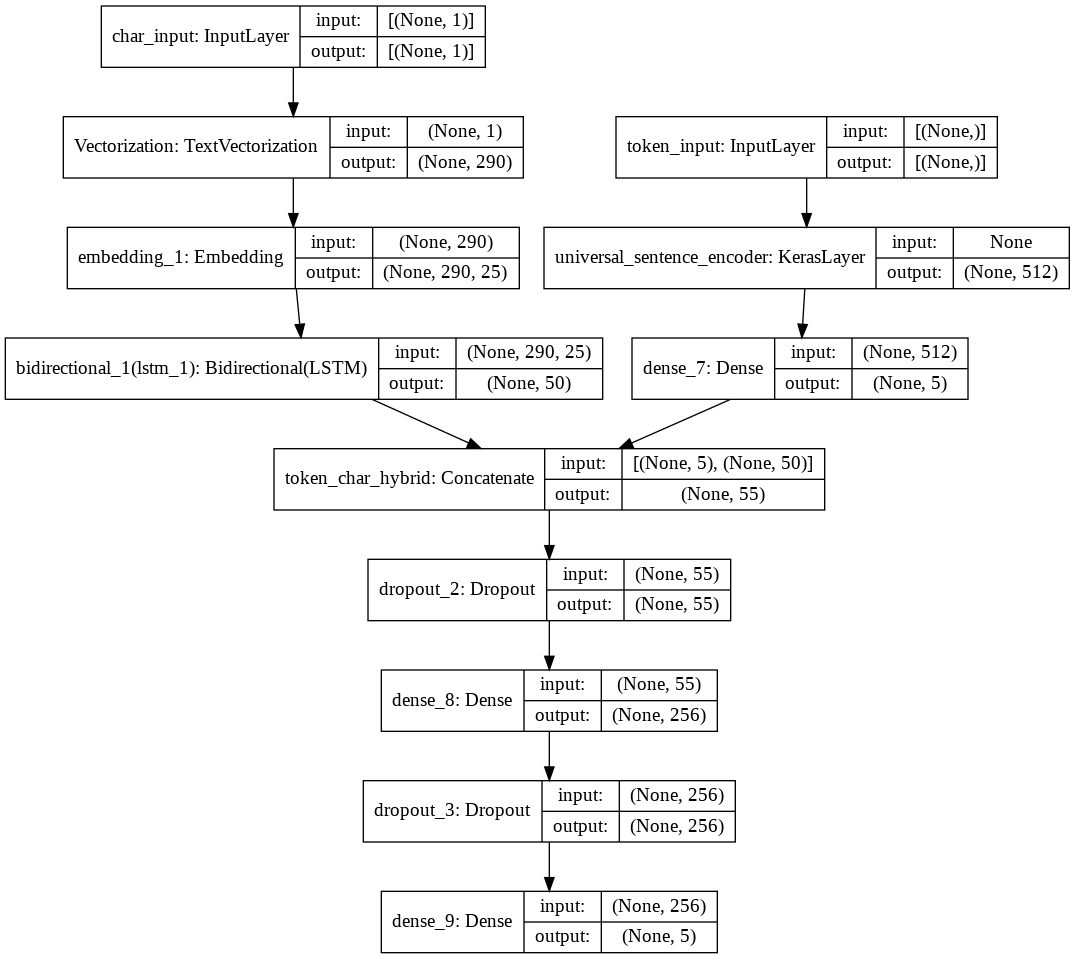

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [ ]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_lines, train_char))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_lines, val_char))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

In [ ]:
history_model_4 = model_4.fit(train_char_token_dataset,steps_per_epoch=len(train_char_token_dataset),epochs=3,validation_data=val_char_token_dataset,validation_steps=0.1*len(val_char_token_dataset))

Epoch 1/3
5627/5627 [==============================] - 626s 111ms/step - loss: 1.0154 - accuracy: 0.5908 - val_loss: 0.8891 - val_accuracy: 0.6589
Epoch 2/3
5627/5627 [==============================] - 624s 111ms/step - loss: 0.8704 - accuracy: 0.6641 - val_loss: 0.9269 - val_accuracy: 0.6717
Epoch 3/3
5627/5627 [==============================] - 624s 111ms/step - loss: 0.8378 - accuracy: 0.6805 - val_loss: 0.8350 - val_accuracy: 0.7145


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 49s 52ms/step - loss: 0.8368 - accuracy: 0.7133


[0.8367971181869507, 0.7132596373558044]

In [ ]:
model_4_pred_probs = tf.argmax(model_4.predict(val_char_token_dataset),axis=1)
model_4_pred_probs

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

In [ ]:
model_4_results = calculate_results(y_true=val_label_encoder,y_pred=model_4_pred_probs)

In [ ]:
model_4_results

{'accuracy': 71.32596319343307,
 'f1': 0.709246091988702,
 'precision': 0.7301383235421626,
 'recall': 0.7132596319343307}

In [ ]:
model_3_results

{'accuracy': 72.86839666357739,
 'f1': 0.7215931463047464,
 'precision': 0.7278364005965428,
 'recall': 0.7286839666357738}

### Model 5: Transfer Learning with pretrained token embeddings + character embedding + positional embedding

In [ ]:
train_df[:5]

,line number,target,text,total lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11


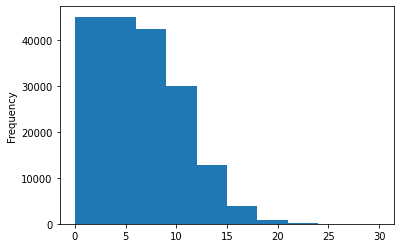

In [ ]:
train_df["line number"].plot.hist()

In [ ]:
np.percentile(train_df["line number"].to_numpy(), 98)

15.0

In [ ]:
train_line_number_onehot = tf.one_hot(train_df["line number"].to_numpy(), depth=15)
val_line_number_onehot = tf.one_hot(val_df["line number"].to_numpy(), depth=15)
test_line_number_onehot = tf.one_hot(test_df["line number"].to_numpy(), depth=15)

In [ ]:
train_line_number_onehot

<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

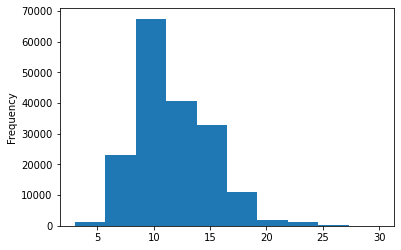

In [ ]:
train_df["total lines"].plot.hist()

In [ ]:
np.percentile(train_df["total lines"].to_numpy(),98)

20.0

In [ ]:
train_total_lines_onehot = tf.one_hot(train_df["total lines"].to_numpy(),depth=20)
val_total_lines_onehot = tf.one_hot(val_df["total lines"].to_numpy(),depth=20)
test_total_lines_onehot = tf.one_hot(test_df["total lines"].to_numpy(),depth=20)

In [ ]:
train_total_lines_onehot

<tf.Tensor: shape=(180040, 20), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Making token based model
token_6_input = layers.Input(shape=(1,),dtype=tf.string, name="Token Input")
token_6_vectors = text_vectorizer(token_6_input)
token_6_embed = embed_layer(token_6_vectors)
x = layers.Conv1D(128,kernel_size=6,padding="same",activation="relu")(token_6_embed)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5,activation="softmax")(x)
token_6_model = tf.keras.Model(token_6_input,outputs)

# Making char based model
char_6_inputs = layers.Input(shape=(1,),dtype=tf.string, name="character_input")
char_6_vectors = char_vectorizer(char_6_inputs)
char_6_embed = embed_layer(char_6_vectors)
char_6_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_6_embed)
char_6_model = tf.keras.Model(char_6_inputs,char_6_bi_lstm)

# Making model for line numbers
line_number_inputs = layers.Input(shape=(15,),dtype=tf.float32, name="line number inputs")
line_number_dense = layers.Dense(32,activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs,line_number_dense)

# Making Total Lines model
total_lines_inputs = layers.Input(shape=(20,),dtype=tf.float32, name="total lines inputs")
total_lines_dennse = layers.Dense(32,activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs,total_lines_dennse)

# Concatinating 
token_char_conactinate = layers.Concatenate(name="Token_Char_Concatinate")([token_6_model.output,char_6_model.output])
z = layers.Dense(256,activation="relu")(token_char_conactinate)
z = layers.Dropout(0.5)(z)
z = layers.Concatenate(name="Token_Char_Positional_Concatination")([line_number_model.output,total_lines_model.output,z])
outputs = layers.Dense(5,activation="softmax", name="Output_Layer")(z)
model_5 = tf.keras.Model([line_number_model.input,total_lines_model.input,token_6_model.input,char_6_model.input],outputs)

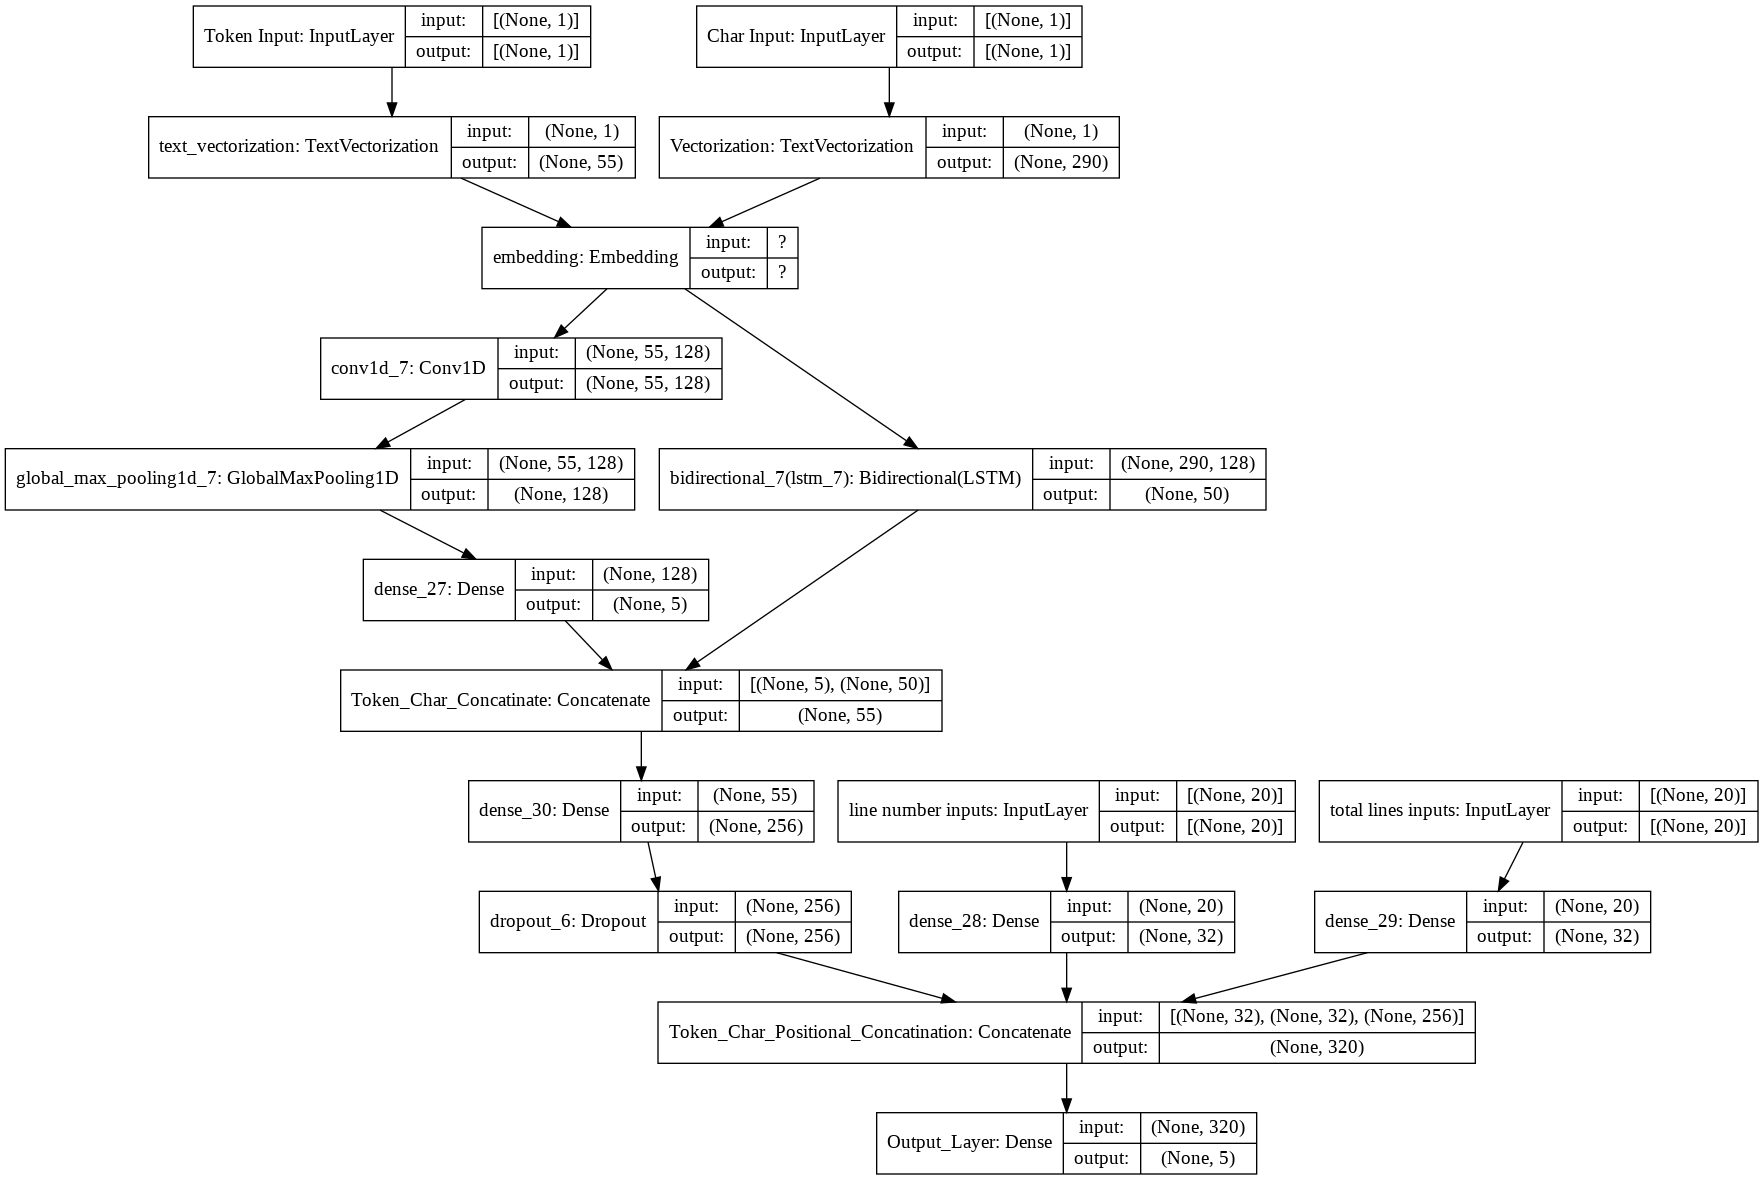

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_5,show_shapes=True,)

In [ ]:
model_5.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_number_onehot,train_total_lines_onehot,train_lines, train_char))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_number_onehot,val_total_lines_onehot,val_lines, val_char))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_char_token_pos_dataset, val_char_token_pos_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

In [ ]:
model_5.fit(train_char_token_pos_dataset,steps_per_epoch=len(train_char_token_pos_dataset),epochs=3,validation_data=val_char_token_pos_dataset,validation_steps=0.1*len(val_char_token_pos_dataset))

Epoch 1/3
5627/5627 [==============================] - 745s 126ms/step - loss: 0.9249 - accuracy: 0.8380 - val_loss: 0.8821 - val_accuracy: 0.8595
Epoch 2/3
5627/5627 [==============================] - 702s 125ms/step - loss: 0.8443 - accuracy: 0.8947 - val_loss: 0.9093 - val_accuracy: 0.8434
Epoch 3/3
5627/5627 [==============================] - 696s 124ms/step - loss: 0.8014 - accuracy: 0.9244 - val_loss: 0.9128 - val_accuracy: 0.8464


In [ ]:
model_5.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 46s 43ms/step - loss: 1.5884 - accuracy: 0.2394


[1.5883700847625732, 0.23937508463859558]

In [ ]:
model_5_pred_probs = tf.argmax(model_5.predict(val_char_token_pos_dataset),axis=1)
model_5_pred_probs

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_5_results = calculate_results(y_true=val_label_encoder,y_pred=model_5_pred_probs)
model_5_results

{'accuracy': 84.88679994704091,
 'f1': 0.8469786533539854,
 'precision': 0.8495014040033455,
 'recall': 0.8488679994704091}

In [ ]:
spec = tf.TensorSpec(shape=[8, 3], dtype=tf.int32, name="Char Input")
tf.TensorSpec.from_spec(spec, "character_input")

TensorSpec(shape=(8, 3), dtype=tf.int32, name='character_input')